# Fake News Detection

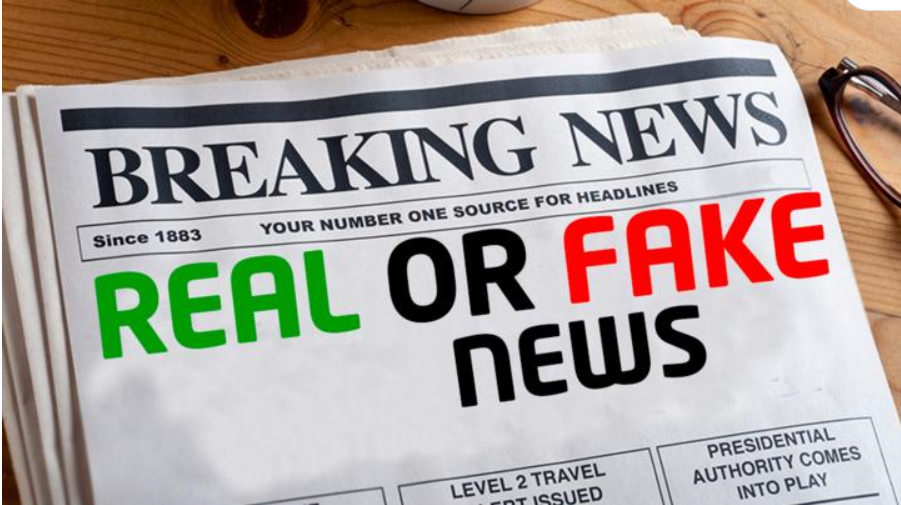

##importing required libraries

In [10]:
import numpy as np            #linear algebra
import pandas as pd           # data processing, CSV file I/O (e.g. pd.read_csv)

#for visualization of the data
import matplotlib.pyplot as plt 
import seaborn as sns

#to split train and test data set
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer    #for feature scaling

# for checking accuracy, precision, f1score, confusion matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
# regular expression
import re
# string manipulation
import string

importing the dataset

In [2]:
df_fake=pd.read_csv("Fake.csv",on_bad_lines='skip',engine='python')
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
398,Trump Praises Coast Guard’s Hurricane Relief ...,Leave it to Donald Trump to disrespect both th...,News,"September 10, 2017"
399,Florida GOP Official Tried To Murder A Teen W...,"Back in May, Republicans in Broward County ele...",News,"September 10, 2017"
400,‘Shoot At Hurricane Irma’ Facebook Event Take...,A Facebook event called Shoot At Hurricane Ir...,News,"September 10, 2017"
401,WATCH: Black Driver Bravely Shames Cop Who Dr...,"When you are Black in America, getting pulled ...",News,"September 10, 2017"


In [3]:
df_true=pd.read_csv("True.csv",on_bad_lines='skip',engine='python')
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
1212,Trump to meet Yellen Thursday in search for ne...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"October 16, 2017"
1213,Trump says he believes Cuba responsible for at...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"October 16, 2017"
1214,U.S. condemns Venezuelan elections as neither ...,WASHINGTON (Reuters) - The United States on Mo...,politicsNews,"October 16, 2017"
1215,EPA head seeks to avoid settlements with green...,WASHINGTON (Reuters) - The head of the U.S. En...,politicsNews,"October 16, 2017"


##Inserting a column class as a target feature

In [4]:
df_fake["class"] = 0
df_true["class"] = 1

In [5]:
df_fake.shape, df_true.shape

((403, 5), (1217, 5))

In [6]:
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

In [7]:
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

##CONCATENATION OF TRUE AND FAKE DATASET

In [11]:
data=pd.concat([df_fake,df_true],axis=0)
data.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


Dropping unwanted columns

In [12]:
data.drop(['title','subject','date'],axis=1,inplace=True)

In [13]:
data.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


###RANDOM SHUFFLING THE DATAFRAME

In [14]:
data=data.sample(frac=1)

In [15]:
data.head()

,text,class
64,"WASHINGTON (Reuters) - Senator Lisa Murkowski,...",1
278,WASHINGTON (Reuters) - U.S. Democratic Senator...,1
329,WASHINGTON (Reuters) - The head of the U.S. Ho...,1
555,WASHINGTON (Reuters) - The tax overhaul pushed...,1
370,An Ohio fireman from Franklin Township has jus...,0


In [16]:
data.reset_index(inplace = True)
data.head()

,index,text,class
0,64,"WASHINGTON (Reuters) - Senator Lisa Murkowski,...",1
1,278,WASHINGTON (Reuters) - U.S. Democratic Senator...,1
2,329,WASHINGTON (Reuters) - The head of the U.S. Ho...,1
3,555,WASHINGTON (Reuters) - The tax overhaul pushed...,1
4,370,An Ohio fireman from Franklin Township has jus...,0


In [17]:
data.drop(["index"], axis = 1, inplace = True)

In [18]:
data.head()

,text,class
0,"WASHINGTON (Reuters) - Senator Lisa Murkowski,...",1
1,WASHINGTON (Reuters) - U.S. Democratic Senator...,1
2,WASHINGTON (Reuters) - The head of the U.S. Ho...,1
3,WASHINGTON (Reuters) - The tax overhaul pushed...,1
4,An Ohio fireman from Franklin Township has jus...,0


###FUNCTION TO PROCESS THE TEXTS

In [19]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [20]:
data['text']=data['text'].apply(wordopt)

###SPLITTING OF DATA

In [21]:
x=data['text']
y=data['class']

###TEXT TO VECTOR







In [22]:
tfv=TfidfVectorizer()
x=tfv.fit_transform(x)

###SPLITTING DATA TO TRAIN AND TEST DATA


In [23]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

###Logistic Regression

In [24]:
#TRAINING THE MODEL
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [25]:
#PREDICTION
y_pred_lr=lr_model.predict(X_test)
y_pred_lr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,

In [26]:
accuracy_score(y_pred_lr,y_test)

0.9598765432098766

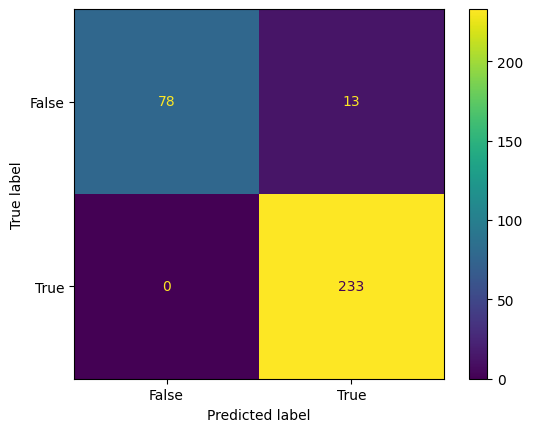

In [27]:
cm = confusion_matrix(y_test, y_pred_lr)
  
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
  
cm_display.plot()
plt.show()

In [28]:
print(classification_report(y_pred_lr,y_test))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        78
           1       1.00      0.95      0.97       246

    accuracy                           0.96       324
   macro avg       0.93      0.97      0.95       324
weighted avg       0.97      0.96      0.96       324



###DECISION TREE CLASSIFIER

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
y_pred_dtc=dtc_model.predict(X_test)
y_pred_dtc

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,

In [31]:
accuracy_score(y_pred_dtc,y_test)

0.9938271604938271

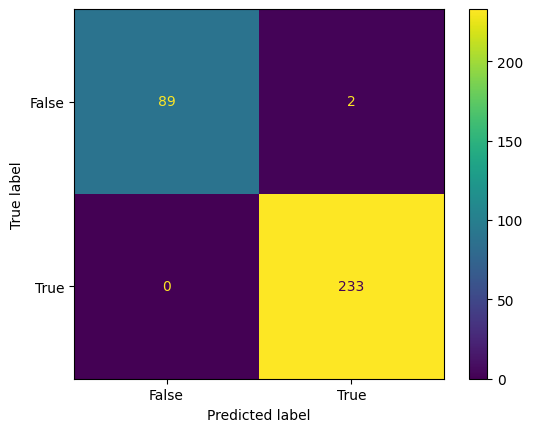

In [32]:
cm = confusion_matrix(y_test, y_pred_dtc)
  
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
  
cm_display.plot()
plt.show()

In [33]:
print(classification_report(y_pred_dtc,y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        89
           1       1.00      0.99      1.00       235

    accuracy                           0.99       324
   macro avg       0.99      1.00      0.99       324
weighted avg       0.99      0.99      0.99       324



###RANDOM FOREST CLASSIFIER

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc_model= RandomForestClassifier(n_estimators=100,criterion='entropy')
rfc_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [35]:
y_pred_rfc=rfc_model.predict(X_test)

In [36]:
y_pred_rfc



array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,

In [37]:
accuracy_score(y_test,y_pred_rfc)

0.9938271604938271

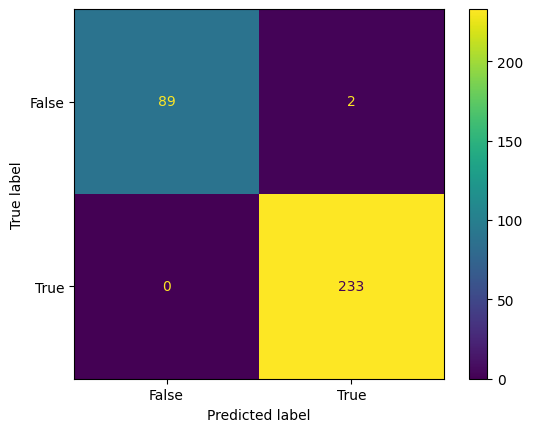

In [38]:
cm = confusion_matrix(y_test, y_pred_rfc)
  
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False, True])
  
cm_display.plot()
plt.show()

In [39]:
print(classification_report(y_pred_rfc,y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        89
           1       1.00      0.99      1.00       235

    accuracy                           0.99       324
   macro avg       0.99      1.00      0.99       324
weighted avg       0.99      0.99      0.99       324



###CHECKING OF OUR INPUT

In [40]:
def checking_our_value():
    
    
    x=X_train[100]
    
    
    print('Logistic Regression',output(lr_model.predict(x)))
    print('Random Forest Classifier',output(rfc_model.predict(x)))
    print('Decision Tree Classifier',output(dtc_model.predict(x)))
    
    
    
    
def output(n):
    
    if n==1:
        
        return 'True news'
        
    else:
         return 'Fake news'

In [41]:
checking_our_value()

Logistic Regression True news
Random Forest Classifier True news
Decision Tree Classifier True news
